In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

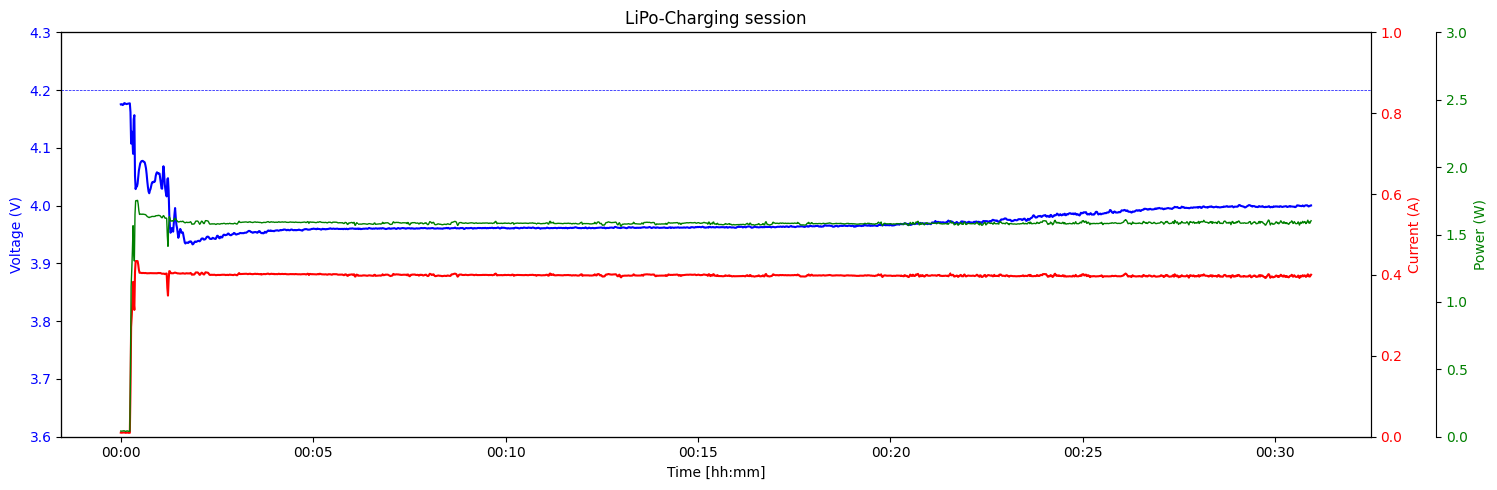

In [100]:
df = pd.read_csv("log.csv", header=None)
df[0] = df[0] - df[0][0]
df[0] = pd.to_datetime(df[0], unit='s')

# ignore 
df[[1, 2]] = df[[1, 2]].replace(to_replace=[x for x in df[[1, 2]].values.flatten() if x > 1000], value=np.nan)

df[3] = df[1] * df[2]

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(15, 5))

# Plot voltage on the left y-axis
ax1.plot(df[0], df[1], color='b', label='Voltage (V)')
ax1.set_xlabel('Time [hh:mm]')
ax1.set_ylabel('Voltage (V)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_ylim(3.6, 4.3)
ax1.axhline(y=4.2, linewidth=0.5, color='b', linestyle='--')

# Create a second y-axis for current
ax2 = ax1.twinx()
ax2.plot(df[0], df[2], color='r', label='Current (A)')
ax2.set_ylabel('Current (A)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylim(0, 1)

ax3 = ax1.twinx()
ax3.plot(df[0], df[3], color='g', label="Power (W)", linewidth=1)
ax3.set_ylabel('Power (W)', color='g')
ax3.tick_params(axis='y', labelcolor='g')
ax3.set_ylim(0, 3)
ax3.spines['right'].set_position(("axes", 1.05))

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Add a title and show the plot
plt.title('LiPo-Charging session')
fig.tight_layout()  # Adjust layout to prevent overlap
plt.show()

0       0.042340
1       0.041282
2       0.042056
3       0.043445
4       0.043231
          ...   
1639    1.580541
1640    1.587848
1641    1.596830
1642    1.589478
1643    1.586858
Length: 1644, dtype: float64